# Proyecto final Coderhouse
Analisis de dataset de Santander
https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset

In [ ]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns
import heapq

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [188]:
#Read the file
df=pd.read_csv("../train.csv", sep=",", index_col="ID_code")
df.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
ID_code                                                                       
train_0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
train_1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
train_2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
train_3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
train_4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

          var_15   var_16   var_17   var_18   var_19   var_20   var_21  \
ID_code                                                                  
train_0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   
train_1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   
train_2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   
train_3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   
train_4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608   

          var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
ID_code                                                                       
train_0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
train_1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
train_2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
train_3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
train_4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   

          var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
ID_code                                                                        
train_0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
train_1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
train_2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
train_3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
train_4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

          var_38  var_39   var_40   var_41   var_42   var_43   var_44  \
ID_code                                                                 
train_0   4.6667  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418   
train_1  10.8160  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444   
train_2  10.8917  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006   
train_3   9.1738  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485   
train_4  19.3038  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087   

          var_45   var_46   var_47   var_48   var_49   var_50   var_51  \
ID_code                                                                  
train_0  -7.0170   5.9226 -14.2136  16.0283   5.3253  12.9194  29.0460   
train_1 -47.3797   7.3718   0.1948  34.4014  25.7037  11.8343  13.2256   
train_2  -7.9078  11.1405  -5.7864  20.7477   6.8874  12.9143  19.5856   
train_3 -24.6840  12.7404 -35.1659   0.7613   8.3838  12.6832   9.5503   
train_4 -65.4863  13.8657   0.0444  -0.1346  14.4268  13.3273  10.4857   

         var_52  var_53  var_54   var_55   var_56  var_57  var_58   var_59  \
ID_code                                                                      
train_0 -0.6940  5.1736 -0.7474  14.8322  11.2668  5.3822  2.0183  10.1166   
train_1 -

In [189]:
#How long data is?
df.shape

(200000, 201)

In [190]:
#Take samples of the data
df.sample(10)

target    var_0   var_1    var_2    var_3    var_4    var_5  \
ID_code                                                                     
train_21079        1   4.5147 -2.7225  12.5709   5.3983  14.2985  -6.6721   
train_147466       0   7.5717 -2.0695  11.7866   6.4298  10.1489 -14.3865   
train_73104        0   6.2876 -6.1285   8.3256   5.0191   9.9110  -7.7140   
train_104506       0   8.4368 -6.6348   9.0474   5.1930   8.3991  -0.2533   
train_166349       1  13.0996 -2.3895   7.2949   6.3796  11.4864   8.2187   
train_78126        0  11.2175 -3.9593   7.6655  10.1515   9.2413  -6.9745   
train_54043        0   8.1477 -6.7413   9.9370   3.3446  13.4720   4.2641   
train_128174       0  13.8278 -8.1429  13.4612   5.5758  11.2920   0.4431   
train_84154        1  13.5211 -0.1522   9.1457   5.3690  10.7582   4.0172   
train_170823       0   9.3065  2.2981  10.1454   7.8618  11.0160   2.2292   

               var_6    var_7   var_8   var_9  var_10   var_11   var_12  \
ID_code                                                                   
train_21079   7.6284  17.4009  2.8140  6.8196 -2.4575   7.8289  13.5743   
train_147466  4.9700  15.3549  2.1522  8.6036  2.8795  -6.6453  14.1190   
train_73104   4.3312  23.1853 -2.9062  6.7740  8.2218  -6.0479  13.9012   
train_104506  4.6387  19.6786  4.0256  8.4862 -5.9627  -3.9025  14.1419   
train_166349  5.9741  17.4813  3.5358  6.0299  9.8253 -10.4765  14.0346   
train_78126   4.7762  14.3456  0.3483  6.5134  3.4725  -1.7891  13.9795   
train_54043   5.4100  15.9320  4.1502  8.7144  3.5214  -0.9877  14.0349   
train_128174  6.0126   9.2818  3.9397  8.1360 -2.8239  -6.4865  13.6322   
train_84154   4.4000  15.4987 -3.5428  8.6853  3.3790   1.6199  13.8136   
train_170823  5.5391  18.6687  7.3614  9.3619  1.5824  -5.9756  13.9443   

               var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
ID_code                                                                       
train_21079   16.8406   9.7082  14.0300  13.4125  -8.4582  27.0886  13.3128   
train_147466  11.1534   8.8314  14.4172  13.6096  -7.6033  28.5558  16.4786   
train_73104    6.5341  11.0851  14.9515   9.1502  -9.4737  11.6520  26.4657   
train_104506  12.9944   3.6473  15.3946   8.2802  -1.3381  19.9935  19.4099   
train_166349   7.7780   9.6783  14.5229  10.8888   3.8487  28.4520  22.3581   
train_78126   -1.8168   5.8901  14.4835   7.8988  -1.0366   0.7141  17.5615   
train_54043    2.1025  11.1227  14.5725   8.3029  -9.8186  19.2563  22.4718   
train_128174  10.4635   6.9080  14.1182   7.0336 -11.4113  21.9229  11.1287   
train_84154    3.5522   8.5261  13.8486   9.3338  -6.0602  26.1811  23.8188   
train_170823  11.5756  11.1725  14.7628   8.4824  -8.0022  20.3259   8.6220   

               var_20   var_21   var_22  var_23   var_24   var_25   var_26  \
ID_code                                                                      
train_21079   -0.3016  23.8197  -0.2232  3.8227   4.2447  13.4666  -7.6202   
train_147466  17.7730  29.8185   5.5788  2.6820  15.3265  13.7691 -18.8875   
train_73104    8.6303   5.1159   1.1064  3.4798  11.6510  14.2505  -6.8982   
train_104506  16.2914  11.4252   3.3566  3.9361  15.4883  13.5630  -7.2241   
train_166349  16.6752  14.9567  11.9789  2.6484   9.1337  13.6782  -1.7915   
train_78126   20.2963  24.8078   4.2207  2.2480  11.1040  13.5492   0.8553   
train_54043   11.9752  10.4552   2.2062  2.9367   8.4525  13.7396  -4.6178   
train_128174  11.1010  30.4024   2.7991  3.4819  15.5907  13.3393  -3.9425   
train_84154    6.1176  20.1982   6.0595  3.3705   9.4737  13.9193  -9.6709   
train_170823  16.4256   1.2336   0.1817  2.1753  10.8827  13.4476  -4.7386   

              var_27  var_28  var_29   var_30   var_31  var_32   var_33  \
ID_code                                                                   
train_21079   0.2141  5.5877  5.0672   2.4041  10.1561  1.3259  10.3997   
train_147466  2.4888  6.0352  1.8643  -4.5098   8.2254  1.1094  14.6749   
tr

In [191]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [192]:
#Validate if there is null
r=df.isnull().sum()
for i in r:
    if i !=0:
        print(i)

In [193]:
#How data look like
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [194]:
#Is there any duplicate?
df.duplicated().sum()

0

In [195]:
#Validate types
df.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

#Drop unless values

In [196]:
df_values=df.drop("target", axis=1)
df_values

var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
ID_code                                                                    
train_0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187   
train_1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208   
train_2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427   
train_3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428   
train_4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405   
...               ...     ...      ...     ...      ...      ...     ...   
train_199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709   
train_199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802   
train_199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555   
train_199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479   
train_199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839   

                var_7   var_8   var_9  var_10   var_11   var_12   var_13  \
ID_code                                                                    
train_0       18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745   
train_1       16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135   
train_2       14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124   
train_3       14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704   
train_4       19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895   
...               ...     ...     ...     ...      ...      ...      ...   
train_199995  15.1516 -0.6209  5.6669  3.7574  -9.5348  13.9860   5.2982   
train_199996  21.5940 -3.6797  6.0019  6.5576 -11.8776  14.4131   3.3087   
train_199997  21.5571  0.1202  6.1629  4.4004  -0.4651  13.8775   9.7414   
train_199998  17.0152 -2.1926  8.7542  1.4245   0.7086  14.2110   6.5641   
train_199999  15.2058 -0.4541  9.3688 -7.3826  -8.7049  14.2486  15.0849   

               var_14   var_15   var_16   var_17   var_18   var_19   var_20  \
ID_code                                                                       
train_0        8.7989  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350   
train_1        5.4345  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   
train_2        7.5244  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559   
train_3        6.4569  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010   
train_4        7.7894  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246   
...               ...      ...      ...      ...      ...      ...      ...   
train_199995   8.2705  14.1527   7.4540  -5.0105  12.0465   8.6349   9.9137   
train_199996   3.5800  14.1597   7.5191  -8.8715  17.9467  17.0237   6.6459   
train_199997  10.9044  14.5597   9.6214  -1.6429  23.1127  12.1517  16.2577   
train_199998   7.6177  13.8771   9.0479 -11.8164  14.0831  -2.0345  18.3863   
train_199999   5.2313  14.3572  12.5523  -6.5066  11.3592  11.4779  15.4997   

               var_21   var_22  var_23   var_24   var_25   var_26  var_27  \
ID_code                                                                     
train_0       16.2191   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073   
train_1        2.7407   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586   
train_2       18.1377   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029   
train_3       12.5579   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059   
train_4       18.9608  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423   
...               ...      ...     ...      ...      ...      ...     ...   
train_199995  25.1376   1.0914  3.2326   7.7802  13.9939   2.9085  0.1005   
train_199996  18.2345   0.8982  2.2532  15.4977  13.3282   5.2281 -3.7424   
train_199997   3.1453   3.1008  2.1497  10.2715  13.5637   4.9473 -0.9905   
train_199998   3.0911   5.5803  3.7091  12.8219  13.8866  -3.3859 -0.4440   
train_199999   3.8474   2.4381  2.8295  10.6681  13.7167  -7.7771 -2.7798   

        

In [197]:
correlations=df.corr()
correlations

target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

            var_6     var_7     var_8     var_9    var_10    var_11    var_12  \
target   0.066731 -0.003025  0.019584 -0.042805 -0.002213  0.022993 -0.069489   
var_0    0.006983  0.002429  0.004962 -0.002613  0.000355  0.003468 -0.001996   
var_1    0.003258  0.001511  0.004098 -0.000832  0.002875  0.004778 -0.001977   
var_2    0.000883 -0.000991  0.002648 -0.001932 -0.000474  0.005180 -0.003781   
var_3   -0.000774  0.002500  0.003553 -0.000826 -0.000897  0.000482 -0.001794   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.001244  0.001854  0.001396 -0.000868 -0.000204 -0.000501  0.000721   
var_196  0.005378  0.001045 -0.003242  0.000052 -0.002243  0.006086 -0.002249   
var_197 -0.003565  0.003466 -0.004583  0.003701  0.002680 -0.005642  0.002946   
var_198 -0.003025  0.000650  0.002950  0.002343 -0.001546 -0.000968  0.007545   
var_199  0.006096 -0.001457  0.000854  0.001070 -0.003561  0.000037 -0.001016   

           var_13    var_14    var_15    var_16    var_17    var_18    var_19  \
target  -0.055156 -0.006332  0.017283  0.008117  0.000864  0.043479  0.011291   
var_0   -0.002717 -0.004584 -0.000043  0.001112 -0.001664  0.004292  0.001505   
var_1   -0.001303 -0.001544  0.004946 -0.002481 -0.001180  0.000289  0.001246   
var_2   -0.008795 -0.002627  0.004063  0.000102  0.000841  0.003529  0.001643   
var_3   -0.005717  0.000534  0.003093  0.003011  0.003618  0.000995 -0.000481   
...           ...       ...       ...       ...       ...       ...       ...   
var_195 -0.006739 -0.002081 -0.001442  0.003222 -0.000691  0.006409 -0.000721   
var_196 -0.001792  0.000639  0.001268 -0.000405 -0.001484  0.004927 -0.002899   
var_197 -0.004304  0.003843 -0.001167  0.001704 -0.000425 -0.003269 -0.000325   
var_198 -0.001896 -0.000571  0.000382  0.002018  0.001190 -0.004619  0.001284   
var_199 -0.003060 -0.004266  0.002613 -0.000637 -0.002404 -0.001419 -0.002175   

           var_20    var_21    var_22    var_23    var_24    var_25    var_26  \
target  -0.018329 -0.058483  0.060558 -0.025473  0.028477  0.013328  0.062422   
var_0   -0.000932  0.000781  0.002322 -0.000987  0.003658  0.001158  0.006117   
var_1   -0.002255 -0.001519  0.001762  0.003606  0.001417  0.000844  0.004778   
var_2    0.002162 -0.006885  0.000297  0.002280  0.001693 -0.000913  0.006138   
var_3    0.003385 -0.000037 -0.002905  0.001633 -0.002006 -0.002307  0.001946   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.001853 -0.003916  0.001618 -0.001793  0.001365  0.000093  0.001488   
var_196  0.000531 -0.003316 -0.000147  0.000748  0.002193  0.000008  0.000300   
var_197  0.000335  0.002419  0.002285 -0.001586  0.004293  0.002041 -0.004430   
var_198  0.005043  0.001164 -0.005303  0.001267  0.001555 -0.001635 -0.005124   
var_199 -0.002770 -0.002598  0.003568  0.001140 -0.000527  0.001498  0.003651   

           var_27    var_28    var_29    var_30    var_31    var_32    var_33  \
target  -0.000582 -0.023942  0.004682 

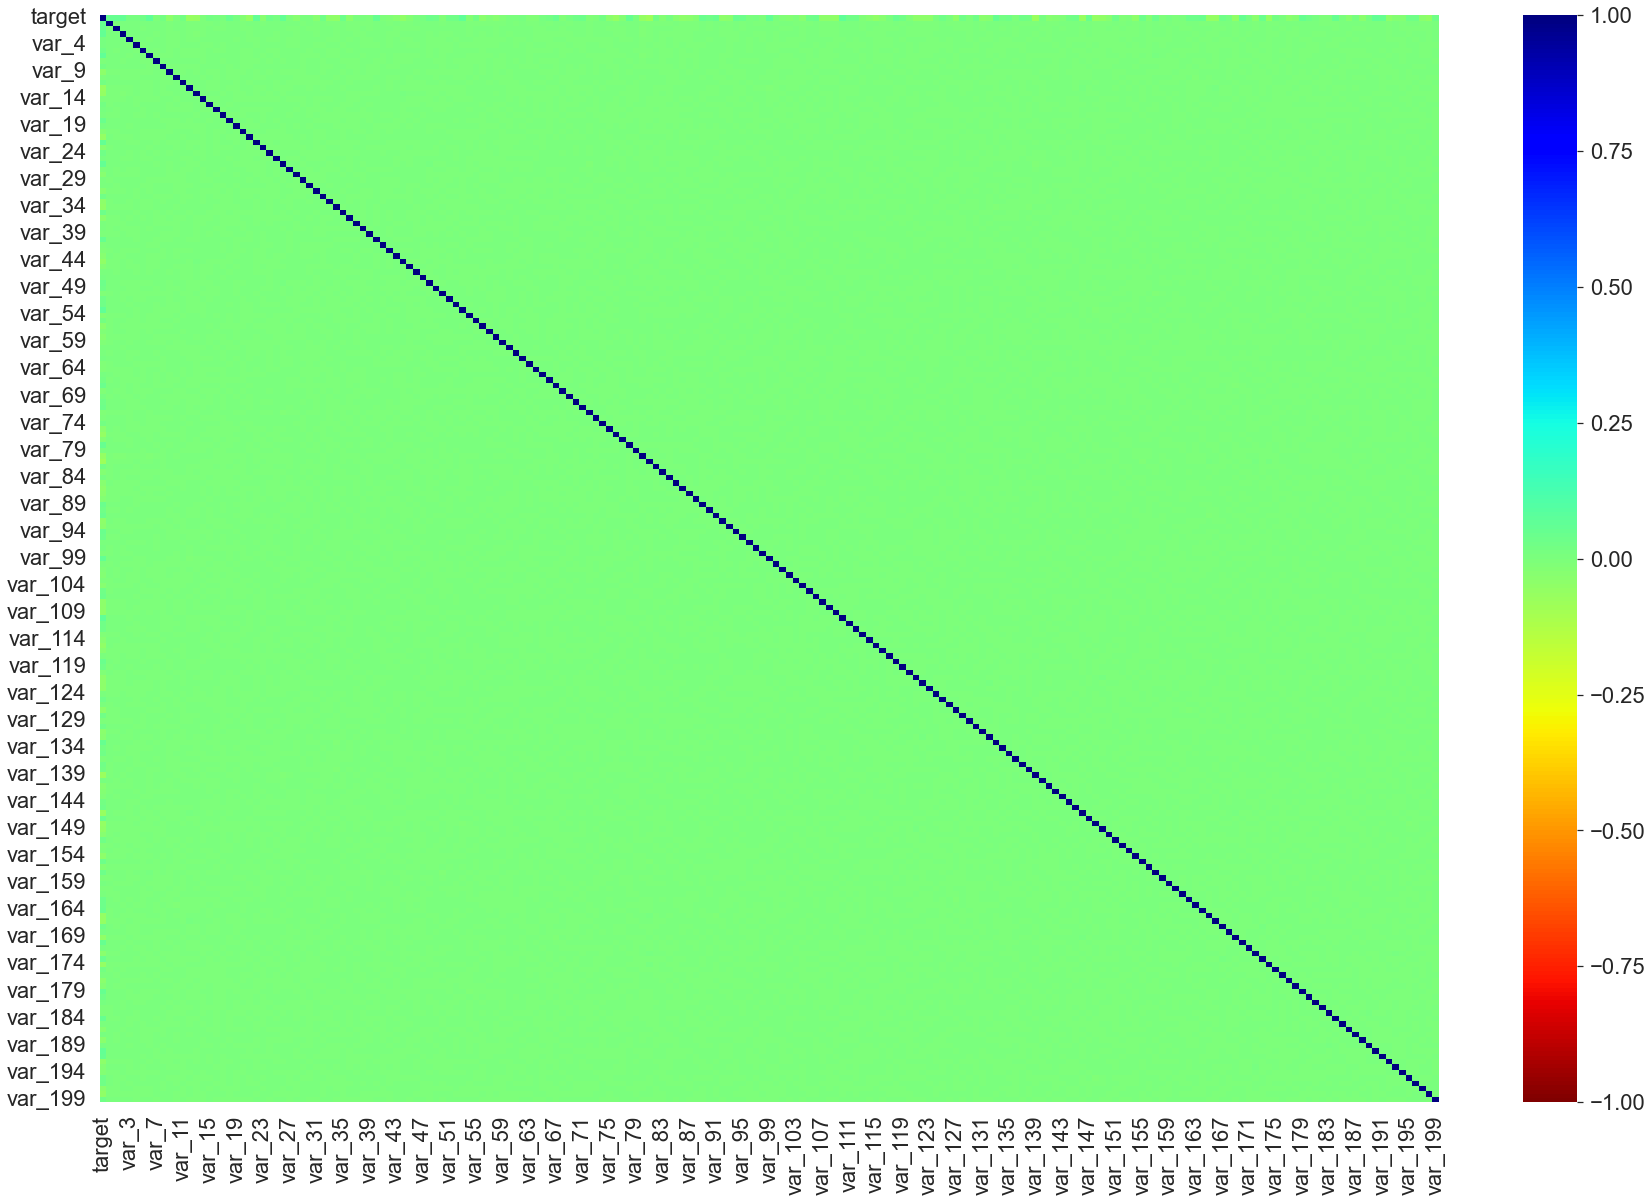

In [198]:
plt.figure(figsize=(30,20))
sns.heatmap(correlations, vmin=-1, vmax=1, cmap='jet_r')
plt.show()

# Analisis de outliers


In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Analisis Univariado

### Comenzaré grafiando algunas variables al azar

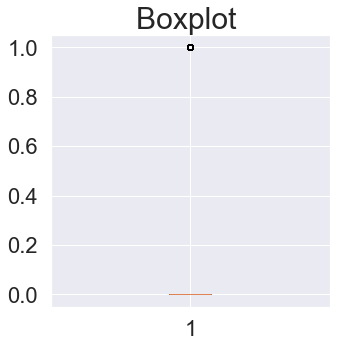

In [200]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

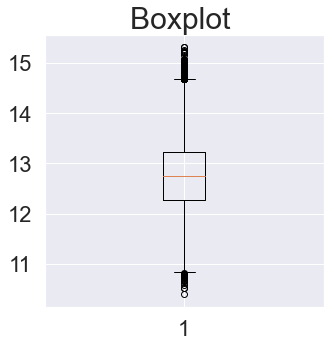

In [201]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_50"])
plt.title("Boxplot ", fontsize=30)
plt.show()

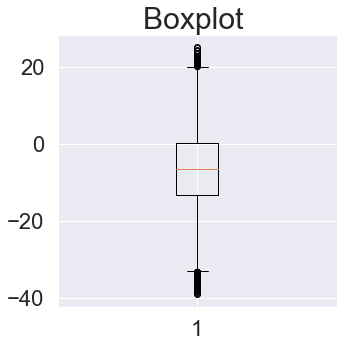

In [202]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_100"])
plt.title("Boxplot ", fontsize=30)
plt.show()

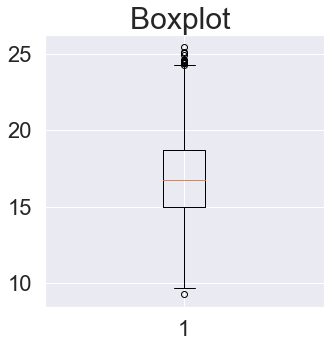

In [203]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_150"])
plt.title("Boxplot ", fontsize=30)
plt.show()

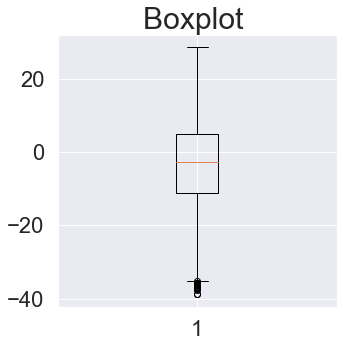

In [204]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_199"])
plt.title("Boxplot ", fontsize=30)
plt.show()

## Vemos que todos los boxplot realizados tienen outliers, se buscará las variables con mayor cantiadad de outliers para graficarlas. 
## Haremos el Analisis Interquartil

In [205]:
Q1=df.quantile(0.25) #Cuartil 25
Q3=df.quantile(0.75) #Cuartil 75
IQR=Q3-Q1

In [206]:
L_BOUND= Q1-1.5*IQR #limite inferiror
H_BOUND= Q3+1.5*IQR #limite superior

In [207]:
columns=list(df.columns)
lista=list(range(0,200)) #Genero lista para iterar

In [208]:
#Calculo los outliers por variable, y saco el indice del mayor
outliers=[]
max_value=-1
column=-1
for i in lista:
    a=len(df[(((df[columns[i]]) < L_BOUND[i])| ((df[columns[i]]) > H_BOUND[i]))])
    outliers.append(a)
    if max_value<a:
        max_value=a
        column=i

In [209]:
outliers.sort(reverse=True) #Ordeno para ver los mayores valores
outliers

[20098,
 1509,
 1208,
 889,
 804,
 733,
 637,
 589,
 572,
 502,
 498,
 470,
 465,
 461,
 446,
 432,
 413,
 401,
 397,
 397,
 383,
 353,
 331,
 325,
 323,
 313,
 309,
 289,
 286,
 279,
 275,
 268,
 263,
 254,
 254,
 251,
 241,
 239,
 233,
 231,
 228,
 222,
 221,
 198,
 193,
 190,
 188,
 187,
 186,
 178,
 177,
 177,
 176,
 172,
 169,
 163,
 162,
 158,
 154,
 152,
 152,
 150,
 148,
 146,
 145,
 144,
 132,
 131,
 131,
 129,
 128,
 125,
 122,
 113,
 109,
 107,
 104,
 104,
 96,
 96,
 95,
 94,
 92,
 90,
 88,
 85,
 84,
 80,
 80,
 76,
 70,
 68,
 66,
 58,
 56,
 53,
 51,
 49,
 49,
 48,
 47,
 43,
 43,
 42,
 41,
 41,
 40,
 39,
 39,
 38,
 38,
 37,
 36,
 35,
 34,
 34,
 32,
 30,
 30,
 28,
 27,
 27,
 27,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 19,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0

#### Obtengo indice de los tres primeros para graficar boxplot


In [210]:
max_0=outliers.index(20098)
max_1=outliers.index(1509)
max_2=outliers.index(1208)
print(max_0,max_1,max_2)

0 1 2


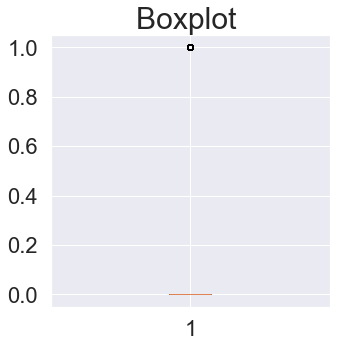

In [211]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

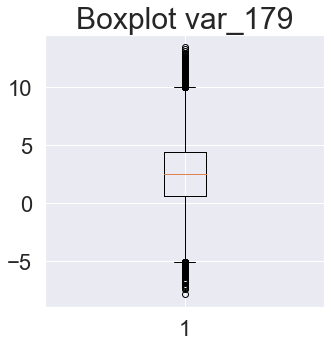

In [212]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_179"])
plt.title("Boxplot var_179", fontsize=30)
plt.show()

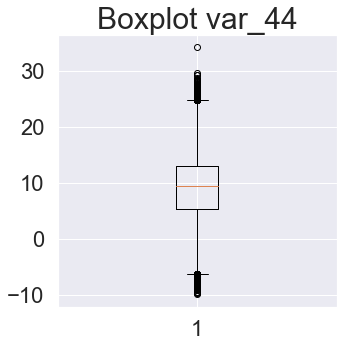

In [213]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_44"])
plt.title("Boxplot var_44", fontsize=30)
plt.show()

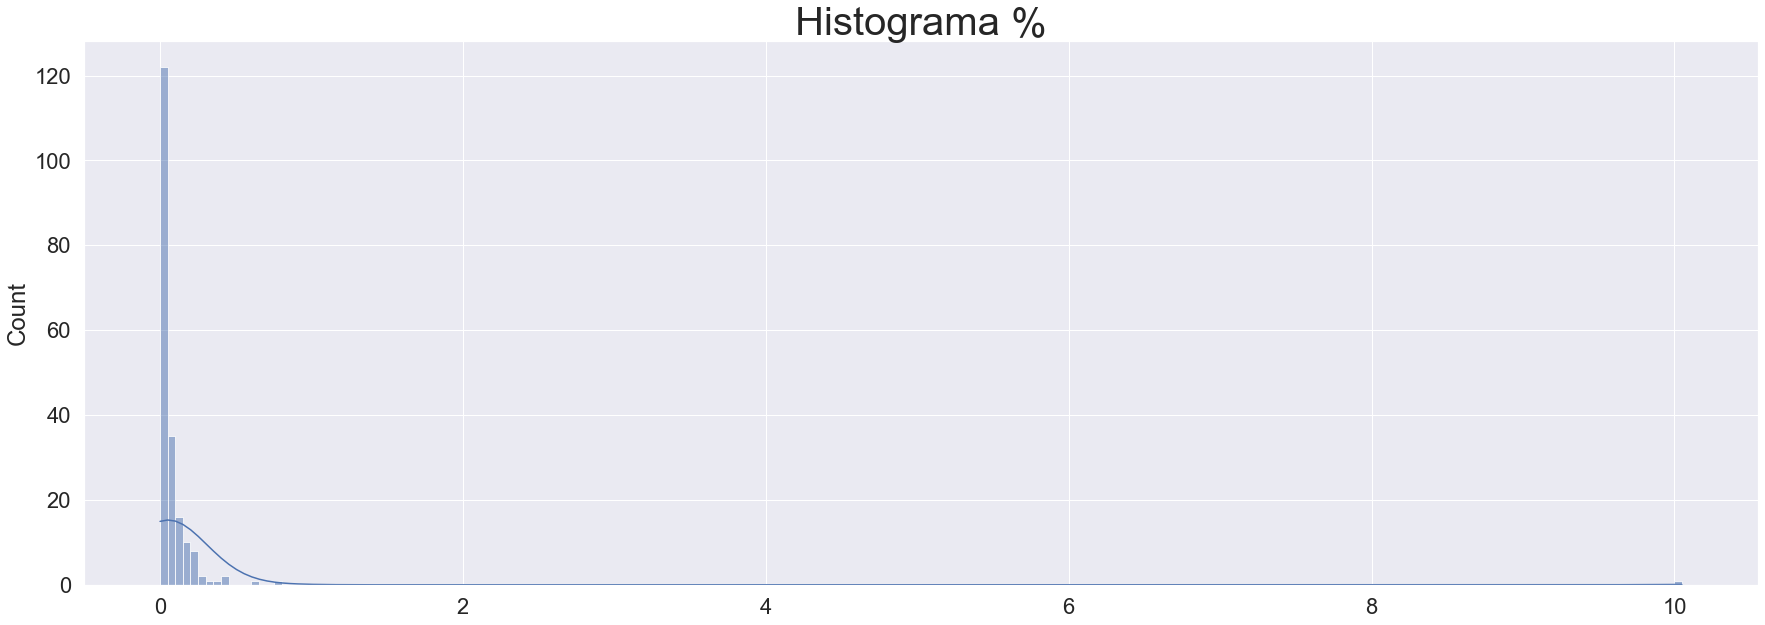

In [214]:
#Calculo el porcentaje de outliers por variable
per_out=[]
for i in outliers:
    per= i/2000
    per_out.append(per)
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.histplot(per_out, bins=200, kde=True)
plt.title("Histograma %", fontsize=40)
plt.show()

### Se confirma que estas variables son las que más outliers tienen dentro del dataframe, es importante destacar que dentro de target las unicas variables que se encuentran son 0 y 1. Y tanto el Q1 como Q3 son 0 entonces sabemos que existen 20098 "1". Por ultimo, podemos apreciar que el porcentaje de outliers por variable es menor al 1% en la mayoría de ellas
###  Además, pasamos a calcular el máximo valor de outliers según analisis univariado para este caso. Sabiendo que si alguna fila coincide pueden ser menos valores 

In [215]:
sumatoria=0
for i in outliers: #Itero para hacer la sumatoria de outliers por variable
    sumatoria+=i
    
print("La cantidad maxima de outliers puede ser", sumatoria)
    

La cantidad maxima de outliers puede ser 46614


# # Analisis de simetria

In [216]:
df_asimetria=list(df.skew()) #Calculo simetria
print(heapq.nlargest(2,df_asimetria), heapq.nsmallest(2,df_asimetria) ) #Obtengo los extremos

[2.6576420477382454, 0.2674136233473473] [-0.34017215733706146, -0.2380906435475246]


In [217]:
#Busco los indices de cada uno
index_max0=df_asimetria.index(2.6576420477382454)
index_max1=df_asimetria.index(0.2674136233473473)
index_min0=df_asimetria.index(-0.34017215733706146)
index_min1=df_asimetria.index(-0.2380906435475246)
print(index_max0,index_max1,index_min0,index_min1)

0 169 45 94


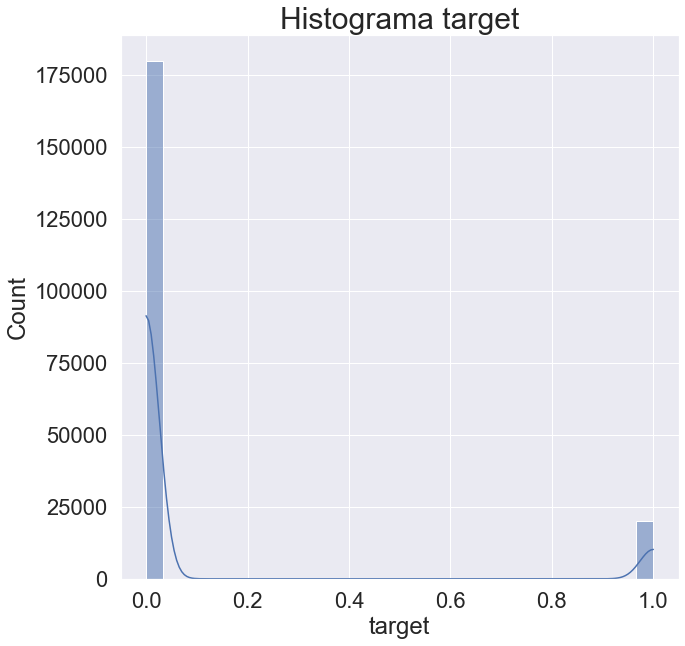

In [218]:
#Grafico histograma de target
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["target"], bins=30, kde=True)
plt.title("Histograma target", fontsize=30)
plt.show()

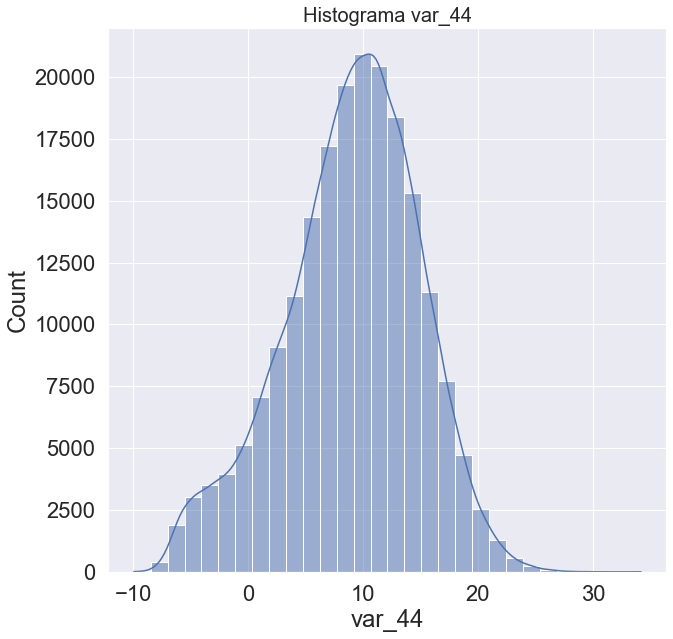

In [219]:
#Grafico histograma del que esta más cercano al extremo -0,34 que es 144
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["var_44"], bins=30, kde=True)
plt.title("Histograma var_44", fontsize=20)
plt.show()

## Podemos validar que todas las variables son aproximadamente asímetrica ya que si sacamos target se encuentra entre -0.34 y 0.26.
## Además, podemos ver en el histograma anterior que es el "más" asimétrico el resutlado es bastante simétrico

Hacer pca y validar que las columnas sean todas distintas

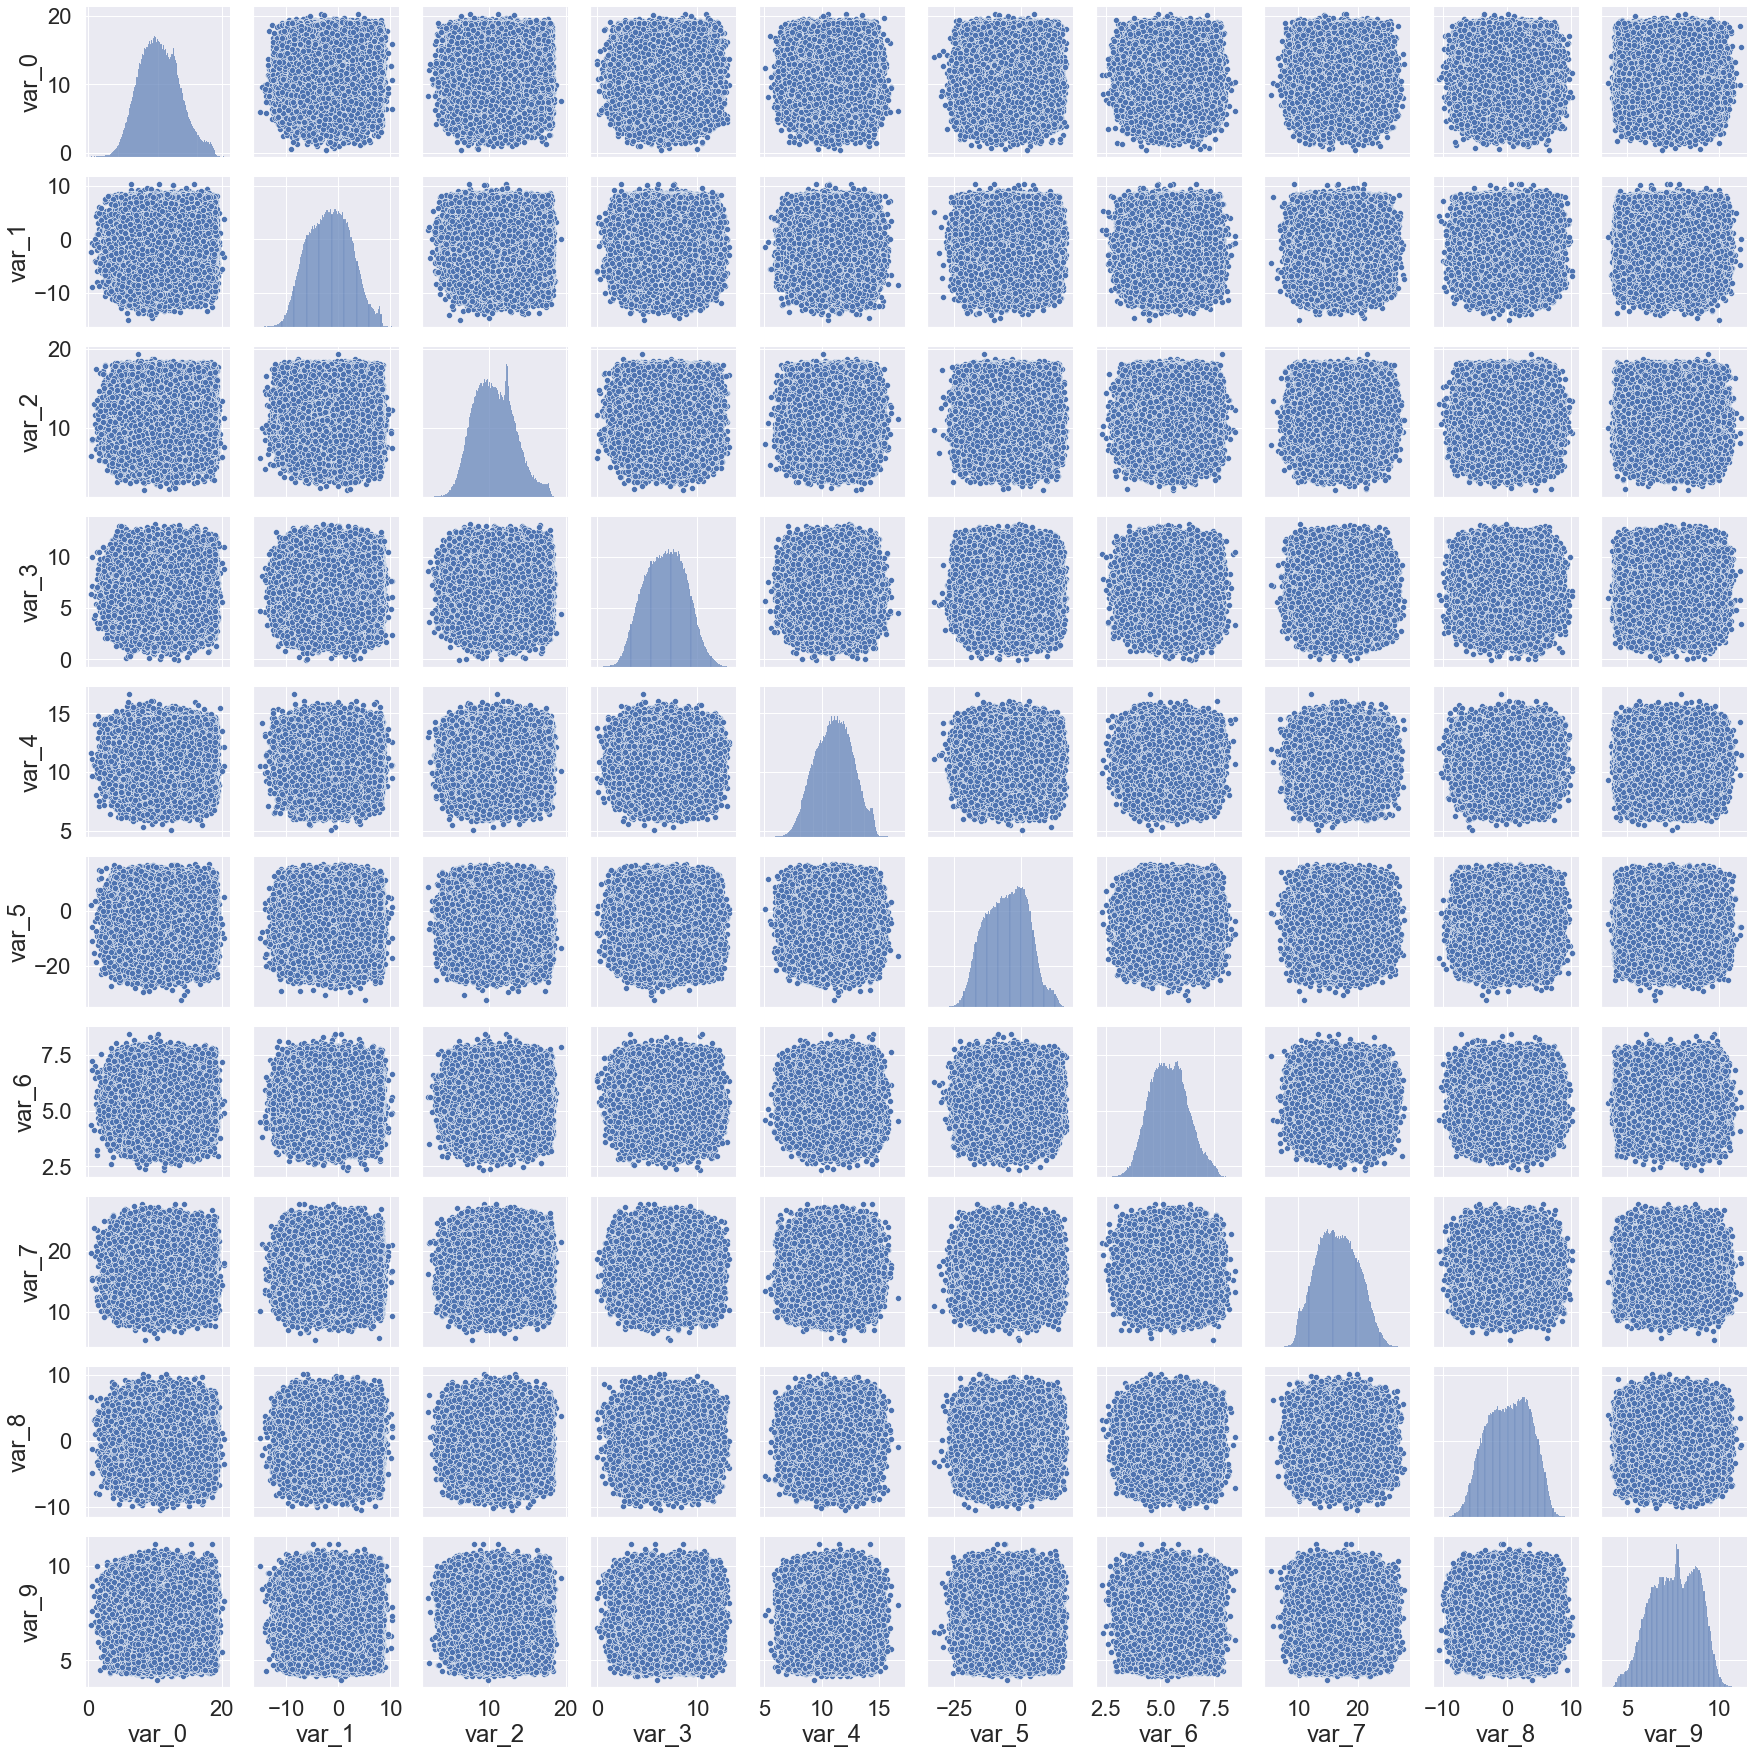

In [220]:
sns.pairplot(df_values.iloc[:,0:10])

# Analisis PCA   
    Debido a la cantidad de variables vamos a realizar una analisis pca para disminuirlo, se destaca que el dataset ya esta estandarizado son entre -1 y 1

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
#Modelo de pca para disminuir de forma fija
pca = PCA(n_components=95)
principalComponents = pca.fit_transform(df_values)

In [223]:
#valido que haya quedado el dataframe en 95
principalDf = pd.DataFrame(data = principalComponents)
principalDf

0          1          2          3          4          5   \
0       -5.606463 -23.554295  -1.899578   5.221643   2.466530  -8.621491   
1       34.878026  11.469188  -3.759891 -19.274519  -8.543739   6.984689   
2       -4.790240  -0.334173  11.359345   8.533285   1.328673  -3.218104   
3       11.875370  14.050771  24.017596  -4.419324   0.372718   5.805571   
4       52.713132  24.315345   4.334341  23.857494 -17.868946  16.346575   
...           ...        ...        ...        ...        ...        ...   
199995 -10.724376  -1.958678  18.592192   0.293567  12.729533  -3.275087   
199996  14.450772  -0.234328 -16.938452  19.531148 -14.598597  -2.183070   
199997  36.842279   7.760184  30.232360  -9.884048   7.400995   4.182532   
199998  30.230917 -24.423535  25.553529  22.586034  -8.758007  -5.847693   
199999  -5.994884   7.697217  10.111554 -11.893114  -7.072937   8.854329   

               6          7          8          9          10         11  \
0        2.713575 -15.071850  11.416620   1.582893  -8.808727   0.803539   
1      -15.539325  -2.989659   8.116641  19.065428   4.790881 -11.514649   
2       22.019322  -1.661980  -4.055710   6.217926 -11.664457  -5.420373   
3       20.132699  12.234928  -1.442370 -14.343340   7.999555  22.746777   
4      -15.373774  11.752701 -18.458602 -14.795935  10.218265 -13.560771   
...           ...        ...        ...        ...        ...        ...   
199995  -4.492193   8.566317  -7.255514 -22.982533  11.463690   2.746034   
199996   1.678269   0.957804   8.627231  11.098946  11.079436   5.419783   
199997  -1.551147  -5.243289  -3.429476   2.322673  -4.163123   8.438233   
199998   1.115170   3.364349   8.653208  11.481208  14.331159 -14.654153   
199999  -8.481800   6.429165  -7.749522  -3.790445  -8.201576  14.544440   

               12         13         14         15         16         17  \
0        1.444850  12.479960  -6.772826 -15.694128 -14.051236   2.362533   
1       -7.973412 -16.213516   0.055061  -8.579172   8.300722 -14.265045   
2       -5.838771  -1.626323   4.860871 -10.977301  -4.693582 -14.020059   
3        4.942080   3.645349   5.697989  14.462231  10.923451   1.131874   
4        7.047285  -3.621294  -3.787845   3.066399  17.252689   4.518659   
...           ...        ...        ...        ...        ...        ...   
199995  12.790173  -2.202677   8.009198  -8.048055  14.142589   7.048321   
199996  -0.506968  20.489710  -1.920844   0.133707   9.530629   8.355088   
199997  -6.958102  -0.213638  -3.567458  -6.134600   2.412363  -0.051050   
199998   2.098761 -21.446782  17.215244   1.478045  -4.715798   8.181076   
199999  -7.621754   2.008851  14.443354   4.840427  -9.294812   9.604060   

               18         19         20         21         22         23  \
0      -13.967334   8.163219   0.769433   1.544911  -3.139042  -3.938527   
1       -0.659742   7.537914   2.163784  10.263257  -8.707011  10.312613   
2        3.586768  10.546056 -13.101900  -7.171180  -5.748064   7.936824   
3       -7.415149 -10.160232  -3.508087  -5.140127  -7.554332  -4.621195   
4       -8.437846 -18.406938  -0.630359  -2.575679   5.225146  -0.729892   
...           ...        ...        ...        ...        ...        ...   
199995  -3.125395  -2.435371   5.212422   6.917686  13.069553  -9.939002   
199996  -0.001299  -7.465921   3.650983 -11.781761  -0.171410   2.444189   
199997  -4.792821  -1.824884  -3.980818   0.938170 -10.871302   8.370259   
199998  14.501282  -7.252040   2.733580  -4.177697  -8.120182   3.630940   
199999   2.256866   4.605679   0.995184   9.465512   0.907759   5.099761   

               24         25         26         27         28         29  \
0       -5.029911  -2.774436   2.669749  -3.881275   0.289885  14.922211   
1       -3.685977  -7.136377 -10.311621   3.279928 -14.128126   1.302803   
2      -16.882877   9.357323  11.102544   5.872783  -0.881876   6.710555   
3       -5.535204   6.266497  -7.898058  -1.801513  -3.8136

In [224]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [225]:
#Al tener tantas variables no puedo observar bien lo que esta pasando por eso aplico PCA por valor
pca.explained_variance_ratio_

array([0.07134872, 0.03102161, 0.0275696 , 0.02691158, 0.02489565,
       0.02287989, 0.02225093, 0.02105403, 0.02086593, 0.02017547,
       0.01843942, 0.01743735, 0.01699429, 0.0168076 , 0.01674814,
       0.01353783, 0.01311899, 0.01251764, 0.01231977, 0.01207323,
       0.0117257 , 0.01160495, 0.01146182, 0.01132443, 0.01120584,
       0.0110347 , 0.01073858, 0.01067919, 0.0104511 , 0.01043076,
       0.00997411, 0.00989094, 0.00983693, 0.00967726, 0.00961898,
       0.00960881, 0.00959017, 0.00947157, 0.0093434 , 0.00918016,
       0.00902135, 0.00899917, 0.00879425, 0.00868899, 0.00861309,
       0.00854901, 0.00841107, 0.00791758, 0.00702965, 0.00700595,
       0.00603635, 0.00592716, 0.0058863 , 0.00571434, 0.00555799,
       0.00554092, 0.0054841 , 0.00545985, 0.00542653, 0.00536958,
       0.00518331, 0.00506131, 0.00502924, 0.00497204, 0.00482442,
       0.00471296, 0.00463432, 0.00462594, 0.00450121, 0.00431014,
       0.00430048, 0.00417291, 0.00415419, 0.00392636, 0.00386

# Machine Learning
Sección destinada a realizar los modelos para predecir la variable targete

In [226]:
#Importo libres
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [227]:
#Cargo los datos de los dataframe
X=df_values
y=df["target"]

In [229]:
#Divido el dataframe en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Arboles de decisión

In [230]:
#Entreno modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [231]:
#Calculo predicciones
y_train_pred=tree.predict(X_train) 
y_test_pred= tree.predict(X_test)

In [232]:
#Valido el accuracy in train and test
train_accuracy= accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print("los valores de accurasy son", train_accuracy, test_accuracy)

los valores de accurasy son 0.9004179104477612 0.8976666666666666


In [233]:
matriz_con= confusion_matrix(y_test, y_test_pred)
matriz_con

array([[59246,     0],
       [ 6754,     0]], dtype=int64)

## Logistic Regression

In [234]:
scaler = StandardScaler() #inicializo el scaler

In [235]:
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)

In [236]:
#Valido que este estandarizado
X_train_log

array([[-1.34280074,  1.98522682,  0.07887604, ...,  0.01705813,
         0.15836638,  0.05683518],
       [-0.20742762,  1.43222219, -0.8810405 , ...,  1.31158732,
        -1.12629007, -1.67761164],
       [ 0.27391916,  0.39489042,  1.51087647, ...,  0.62541729,
         1.09431944,  0.48083664],
       ...,
       [ 2.01053894,  0.65170173, -0.18240189, ..., -1.02752   ,
        -0.81398468, -0.703597  ],
       [-0.23070211,  2.24391699,  0.8310605 , ..., -0.91928032,
         1.82493604,  0.06414952],
       [ 0.30576499, -0.44088353, -0.64708575, ...,  1.795623  ,
        -1.1567767 ,  0.33426231]])

In [237]:
#Aplico el PCA
pca = PCA(n_components=50)
pca.fit(X_train_log)
X_train_log = pca.transform(X_train_log)
X_test_log = pca.transform(X_test_log)

In [238]:
#Aplico regresion lineal 
logisticRegr = LogisticRegression(max_iter=10000)

In [239]:
#Hago el fit del modelo
logisticRegr.fit(X_train_log, y_train)

LogisticRegression(max_iter=10000)

In [240]:
# Predict for One Observation (image)
print(logisticRegr.predict(X_test_log[0:100]), y_test[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0] ID_code
train_119737    0
train_72272     0
train_158154    0
train_65426     0
train_30074     1
               ..
train_182091    1
train_31929     0
train_78446     0
train_145114    1
train_96761     0
Name: target, Length: 100, dtype: int64


In [242]:
y_pred=logisticRegr.predict(X_test_log)

In [244]:
#Calulo el score del modelo 
logisticRegr.score(X_test_log, y_test)

0.906530303030303

In [245]:
precision_score(y_test,y_pred , average='macro')

0.7916898169616851

In [246]:
precision_score(y_test, y_pred, average='micro')

0.906530303030303

In [247]:
precision_score(y_test, y_pred, average='weighted')

0.8880332210645122

In [248]:
#Valido la cantidad de componentes
pca.n_components_

50

### KNN

In [249]:
#Inicializo el modelo
knn= KNeighborsClassifier()

In [250]:
#Entreno el modelo
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [255]:
#Predigo las y
y_pred_knn= knn.predict(X_test)
y_pred_knn_train= knn.predict(X_train)

In [258]:
#Calculo matriz de confusión
matriz_con= confusion_matrix(y_test, y_pred_knn)
matriz_con

array([[59170,    76],
       [ 6735,    19]], dtype=int64)

In [257]:
#Accuracy de knn
train_accuracy_knn= accuracy_score(y_train,y_pred_knn_train)
test_accuracy_knn=accuracy_score(y_test,y_pred_knn)

0.9025522388059701

In [259]:
train_accuracy_knn,test_accuracy_knn

(0.9025522388059701, 0.8968030303030303)

### Radom Forest

In [260]:
rfc=RandomForestClassifier()

In [261]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [262]:
#Predigo las y
y_pred_rfc= rfc.predict(X_test)
y_pred_rfc_train= knn.predict(X_train)

In [263]:
#Calculo matriz de confusión
matriz_con= confusion_matrix(y_test, y_pred_rfc)
matriz_con

array([[59246,     0],
       [ 6752,     2]], dtype=int64)

In [264]:
#Accuracy de knn
train_accuracy_knn= accuracy_score(y_train,y_pred_rfc_train)
test_accuracy_knn=accuracy_score(y_test,y_pred_knn)
print(train_accuracy_knn,test_accuracy_knn)

0.9025522388059701 0.8968030303030303
